In [1]:
import h5py, os, nilearn
import matplotlib.pyplot as plt
import numpy as np
#from nilearn import input_data, datasets, plotting
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import view_img_on_surf, view_img
from nltools.stats import isc, threshold, fdr
from tqdm import tqdm
import pandas as pd
import re

In [2]:
isc_result_folder_path = './fmri/seasons/isc_results/'
files = sorted(os.listdir(isc_result_folder_path))
files

['isc_task-s01e01a.npy',
 'isc_task-s01e01b.npy',
 'isc_task-s01e02a.npy',
 'isc_task-s01e02b.npy',
 'isc_task-s01e03a.npy',
 'isc_task-s01e03b.npy',
 'isc_task-s01e04a.npy',
 'isc_task-s01e04b.npy',
 'isc_task-s01e05a.npy',
 'isc_task-s01e05b.npy',
 'isc_task-s01e06a.npy',
 'isc_task-s01e06b.npy',
 'isc_task-s01e07a.npy',
 'isc_task-s01e07b.npy',
 'isc_task-s01e08a.npy',
 'isc_task-s01e08b.npy',
 'isc_task-s01e09a.npy',
 'isc_task-s01e09b.npy',
 'isc_task-s01e10a.npy',
 'isc_task-s01e10b.npy',
 'isc_task-s01e11a.npy',
 'isc_task-s01e11b.npy',
 'isc_task-s01e12a.npy',
 'isc_task-s01e12b.npy',
 'isc_task-s01e13a.npy',
 'isc_task-s01e13b.npy',
 'isc_task-s01e14a.npy',
 'isc_task-s01e14b.npy',
 'isc_task-s01e15a.npy',
 'isc_task-s01e15b.npy',
 'isc_task-s01e16a.npy',
 'isc_task-s01e16b.npy',
 'isc_task-s01e17a.npy',
 'isc_task-s01e17b.npy',
 'isc_task-s01e18a.npy',
 'isc_task-s01e18b.npy',
 'isc_task-s01e19a.npy',
 'isc_task-s01e19b.npy',
 'isc_task-s01e20a.npy',
 'isc_task-s01e20b.npy',


In [7]:
len(files)

280

In [3]:

isc_results_a = []
isc_results_b = []


for current_file in files:
    if current_file.endswith("a.npy"):
        f_to_load = isc_result_folder_path + current_file
        isc_results_a.append(np.load(f_to_load))
    elif current_file.endswith("b.npy"):
        f_to_load = isc_result_folder_path + current_file
        isc_results_b.append(np.load(f_to_load))
        
isc_results_a = np.asarray(isc_results_a)
isc_results_b = np.asarray(isc_results_b)

print("Odd Array:", isc_results_a.shape)
print("Even Array:", isc_results_b.shape)



isc_results = []
for current_file in files:
    f_to_load = isc_result_folder_path + current_file
    isc_results.append(np.load(f_to_load))

isc_results = np.asarray(isc_results)
isc_results.shape

Odd Array: (137, 1000)
Even Array: (137, 1000)


(280, 1000)

920
TPJ


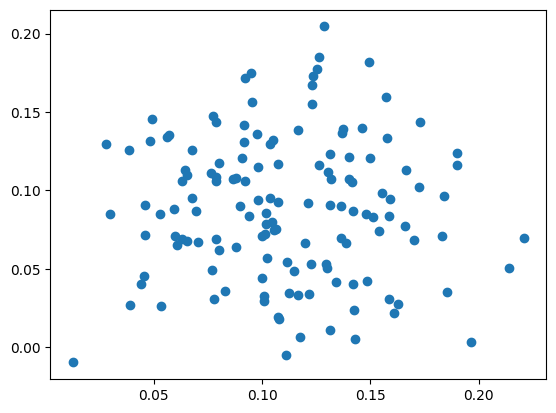

-0.024505203672713374
545
visual cortex


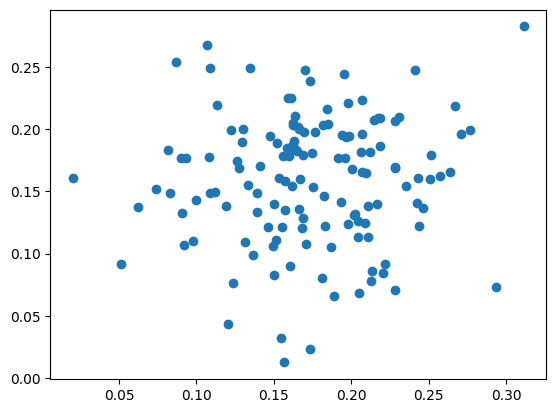

0.06297964405420557
598
auditory cortex


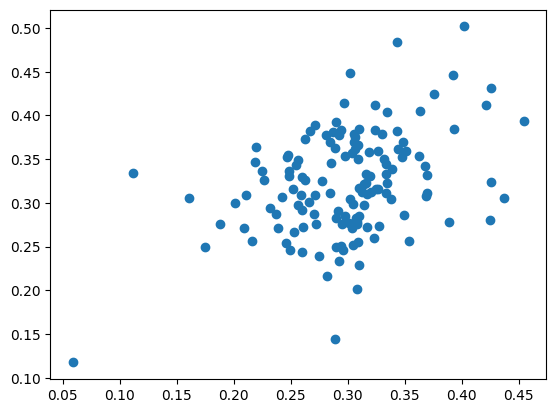

0.38869302245186976


In [5]:
roi_labels = ['TPJ', 'visual cortex', 'auditory cortex']
roi_nums = [920, 545, 598]   # 598 auditory   # 920 tpj    545 visual
for current_roi_num in range(len(roi_nums)):
    current_roi = roi_nums[current_roi_num]
    print(current_roi)
    print(roi_labels[current_roi_num])
    plt.scatter(isc_results_a[:, current_roi],
                isc_results_b[:, current_roi])
    plt.show()
    print(np.corrcoef(isc_results_a[:, current_roi],
                      isc_results_b[:, current_roi])[0,1])

In [6]:
print(np.mean(isc_results_a[:,545]))
print(np.mean(isc_results_b[:,545]))

0.17327065787996854
0.15938260858024142


In [8]:
isc_results.shape

(280, 1000)

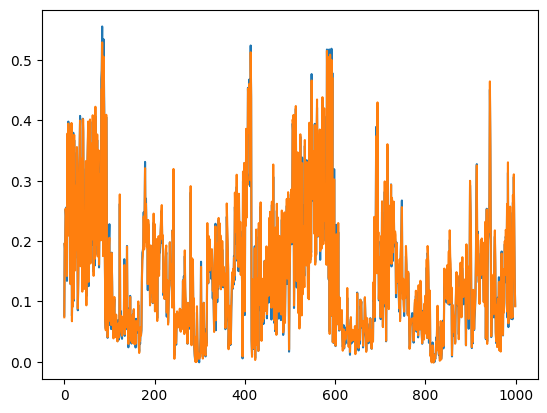

In [9]:
plt.plot(np.mean(isc_results[:140,:], axis = 0));
plt.plot(np.mean(isc_results[140:,:], axis = 0));

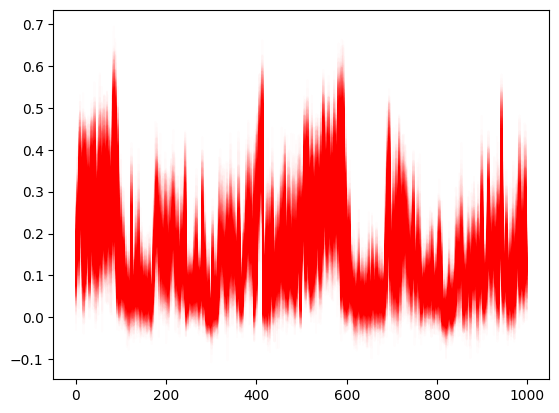

In [30]:
plt.plot(isc_results.T, alpha = 0.01, color = 'red');

<Axes: >

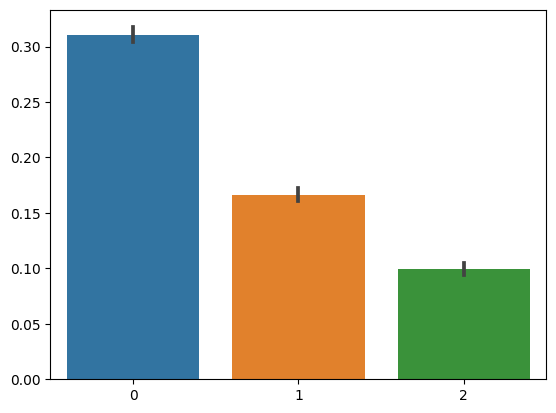

In [24]:
roi_labels = [ 'auditory cortex',  'visual cortex', 'TPJ',]
roi_nums = [598, 545, 920]   # 598 auditory   # 920 tpj    545 visual
selection = isc_results[:, roi_nums]
sel_df = pd.DataFrame(selection)
import seaborn as sns

sns.barplot(sel_df)

### Plot

In [25]:
schaefer = nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=1000, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)
schaefer_rois_file       = schaefer['maps']

# set up mask
mask = Brain_Data(schaefer['maps'])
mask_x = expand_mask(mask)

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


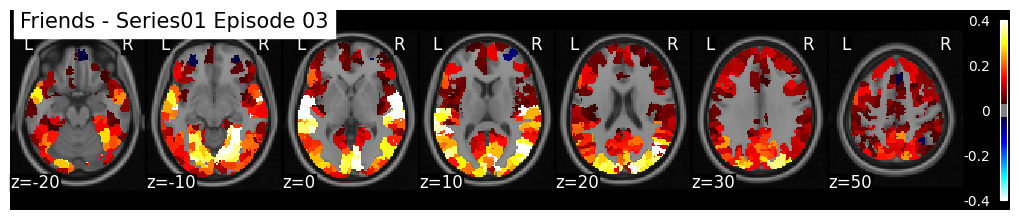

In [26]:
one_isc_result = isc_results[0, :]
#one_isc_result = np.reshape(one_isc_result, (1000,1))
one_isc_result.shape

isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
fig = plt.figure(figsize=(10, 2))
nilearn.plotting.plot_stat_map(    isc_r_brain, 
                                       bg_img       = './MNI152_T1_2mm.nii.gz',
                                       threshold    = 0.03,  #additional threshold for visualization
                                       vmax         = 0.4, 
                                       draw_cross   = False,
                                       display_mode = 'z',
                                       cut_coords   = [ -20, -10, 0, 10, 20, 30, 50],
                                       annotate     = True,
                                       figure = fig,
                                       title = 'Friends - Series01 Episode 03');

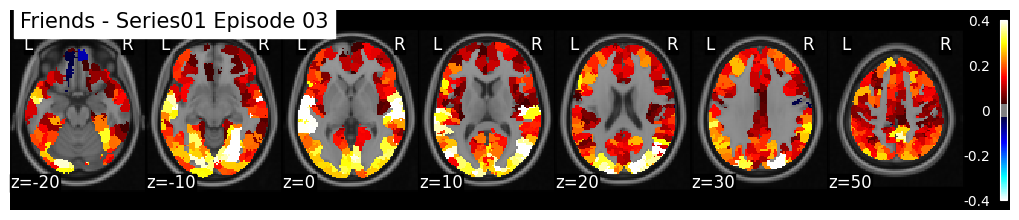

In [27]:
one_isc_result = isc_results[100, :]
#one_isc_result = np.reshape(one_isc_result, (1000,1))
one_isc_result.shape

isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
fig = plt.figure(figsize=(10, 2))
nilearn.plotting.plot_stat_map(    isc_r_brain, 
                                       bg_img       = './MNI152_T1_2mm.nii.gz',
                                       threshold    = 0.03,  #additional threshold for visualization
                                       vmax         = 0.4, 
                                       draw_cross   = False,
                                       display_mode = 'z',
                                       cut_coords   = [ -20, -10, 0, 10, 20, 30, 50],
                                       annotate     = True,
                                       figure = fig,
                                       title = 'Friends - Series01 Episode 03');

In [28]:
one_isc_result.shape

(1000,)

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



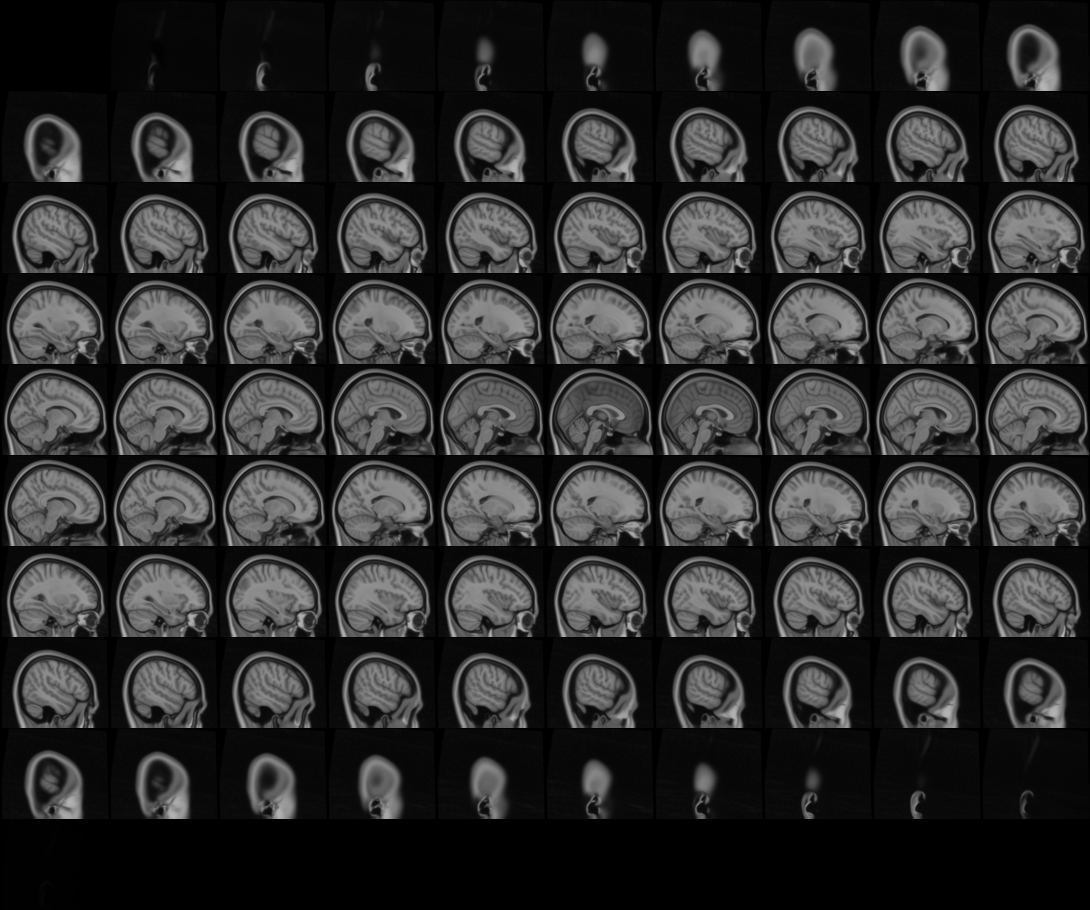
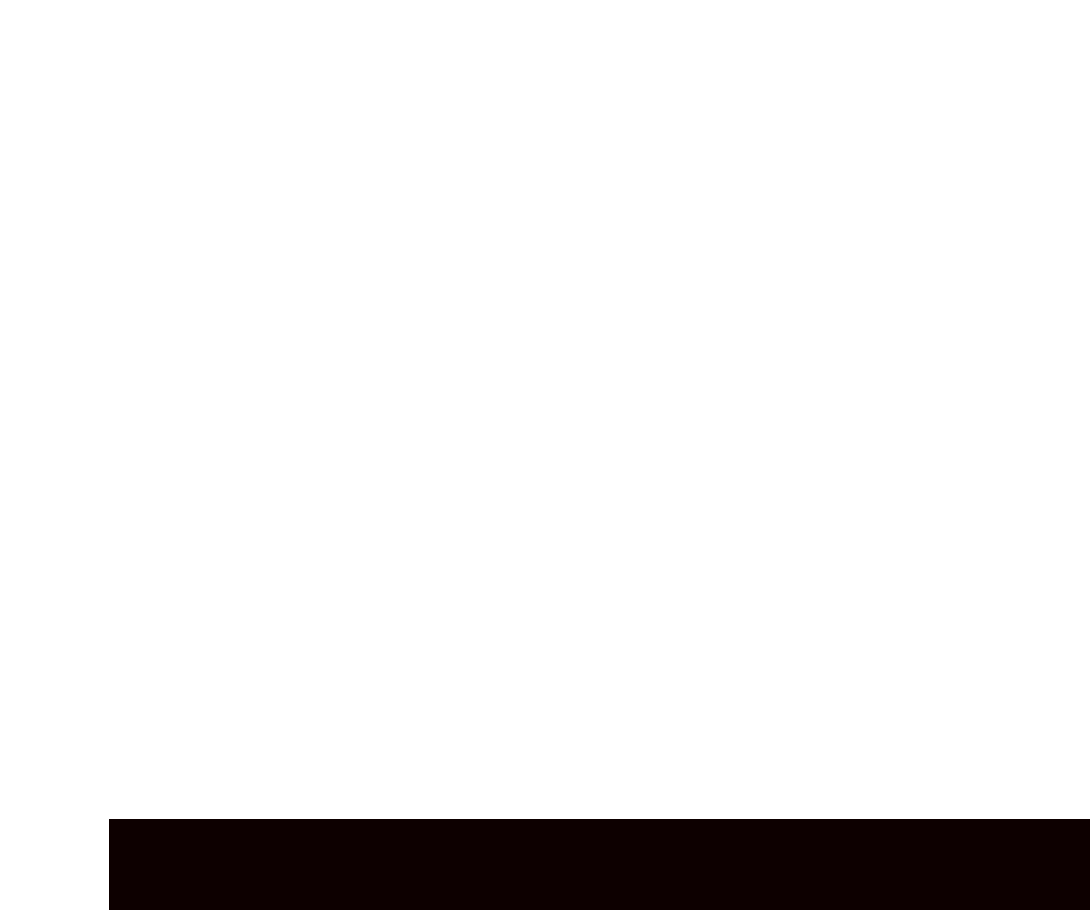

In [29]:
one_isc_result = np.zeros(1000)
one_isc_result[598] = 1  #note 920 here is definitely TPJ (overlap with neurosynth, can also look into others.)
isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
img = nilearn.plotting.view_img(    isc_r_brain, 
                                       bg_img       = './MNI152_T1_2mm.nii.gz');
img

In [30]:
isc_r_brain.to_filename('text920.nii')

In [31]:
ls

00_SaveEpisodes.ipynb       requirements.txt
01_ISC_allepisodes.ipynb    stimuli/
02_Load_ISC_plot.ipynb      sub-01_task-s01e02a.npy
Friends_Explor-Copy1.ipynb  sub-02_task-s01e02a.npy
Friends_Explor.ipynb        sub-03_task-s01e02a.npy
LICENSE                     sub-05_task-s01e02a.npy
MNI152_T1_2mm.nii.gz        test.h5
README.md                   text.nii
code/                       text920.nii
fmri/                       text922.nii
media/                      tutorial/


Text(0.5, 1.0, 'ISC in TPJ in red and Visual Cortex in green and Auditory Cortex in blue')

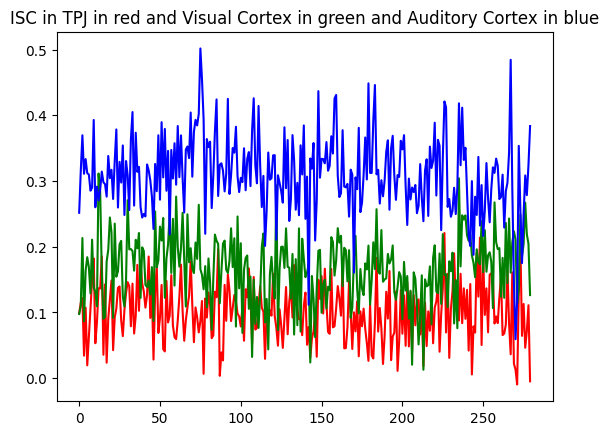

In [32]:
plt.plot(isc_results[:, 920], 'red')
plt.plot(isc_results[:, 545], 'green')
plt.plot(isc_results[:, 598], 'blue')


plt.title('ISC in TPJ in red and Visual Cortex in green and Auditory Cortex in blue')

0.12044342830785282

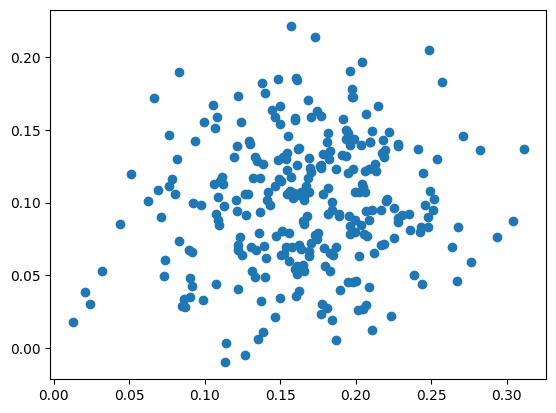

In [33]:
plt.scatter(isc_results[:, 545], isc_results[:, 920])
np.corrcoef(isc_results[:, 545], isc_results[:, 920])[0,1]

0.04012909962313587

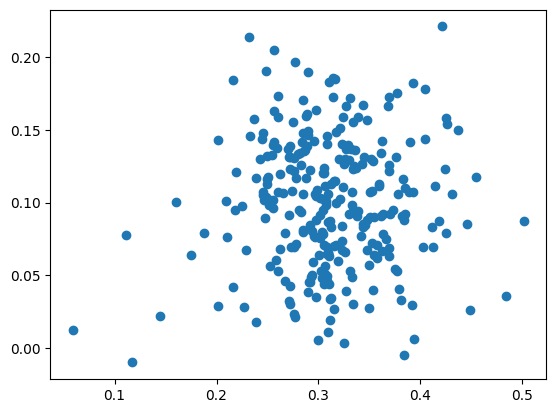

In [35]:
plt.scatter(isc_results[:, 598], isc_results[:, 920])
np.corrcoef(isc_results[:, 598], isc_results[:, 920])[0,1]

0.016311723548238007

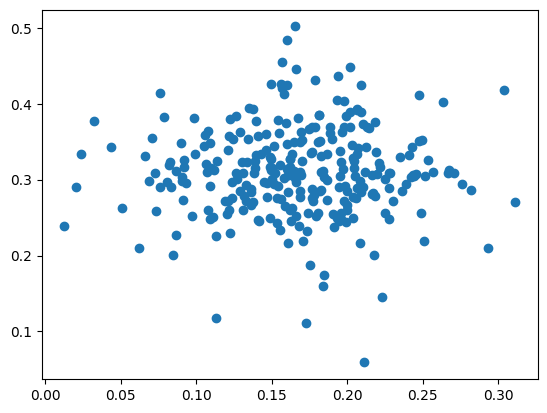

In [36]:
plt.scatter(isc_results[:, 545], isc_results[:, 598])
np.corrcoef(isc_results[:, 545], isc_results[:, 598])[0,1]

array([[1.        , 0.30986416],
       [0.30986416, 1.        ]])

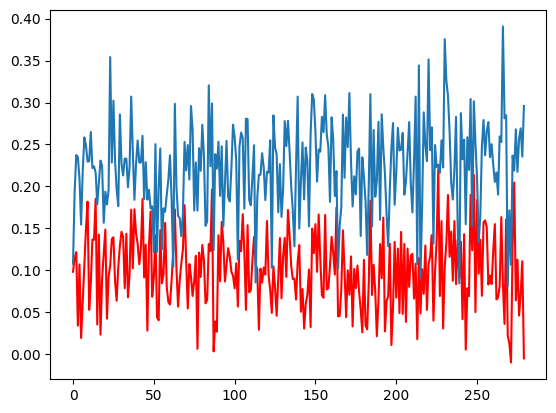

In [46]:
plt.plot(isc_results[:, 920], color = 'red')
plt.plot(isc_results[:, 380])

np.corrcoef(isc_results[:, 920],
            isc_results[:, 380])

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



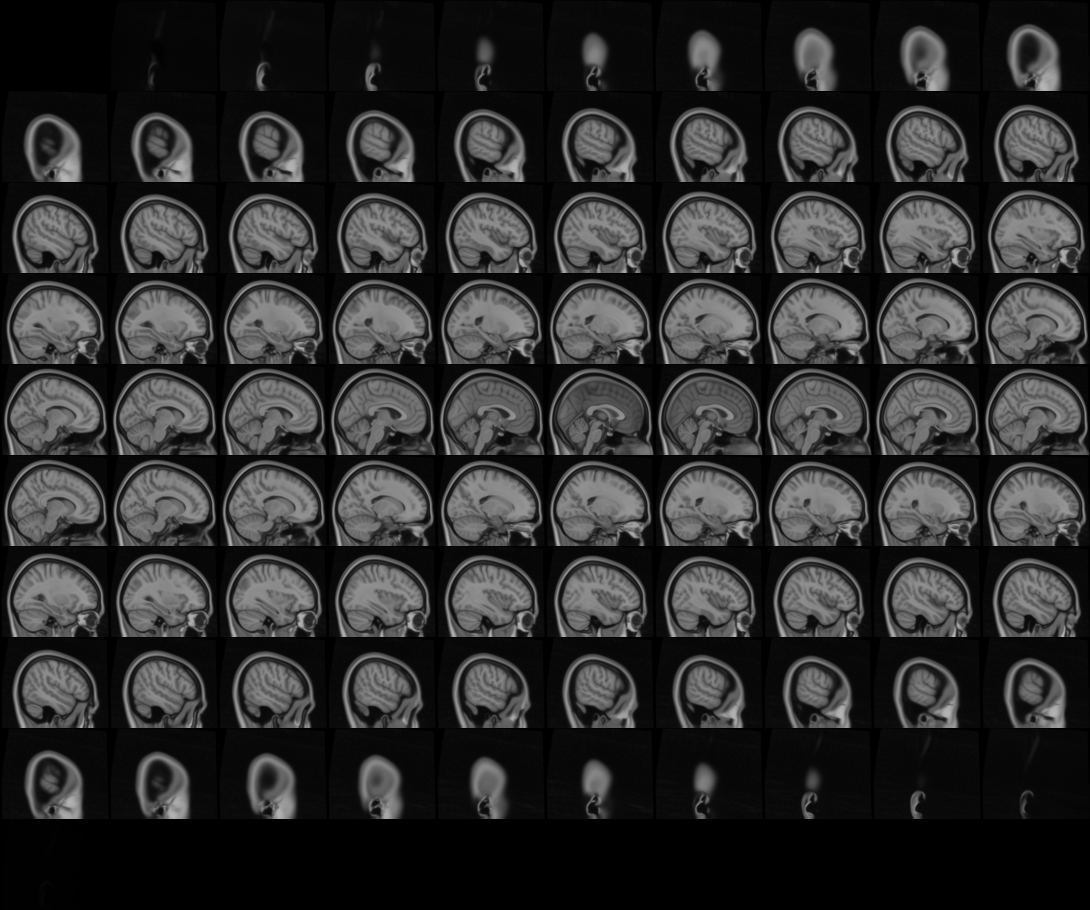
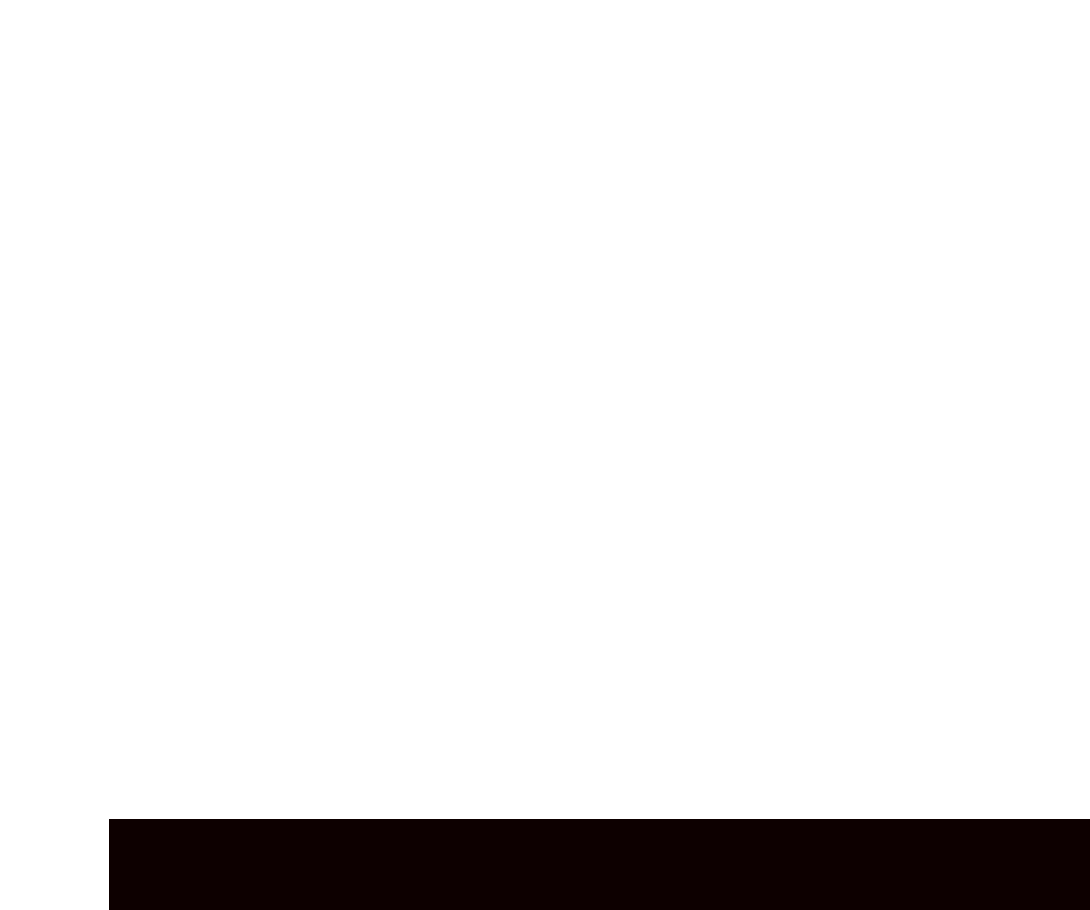

In [45]:
one_isc_result = np.zeros(1000)
one_isc_result[380] = 1  #note 920 here is definitely TPJ (overlap with neurosynth, can also look into others.)
one_isc_result[920] = 1 
isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
img = nilearn.plotting.view_img(    isc_r_brain, 
                                       bg_img       = './MNI152_T1_2mm.nii.gz');
img

In [47]:
isc_results.shape

(280, 1000)

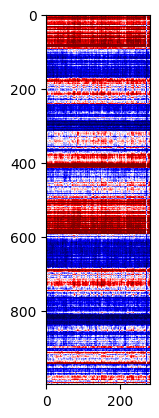

In [52]:
plt.imshow(isc_results.T, cmap = 'seismic', vmin = 0, vmax =0.3)

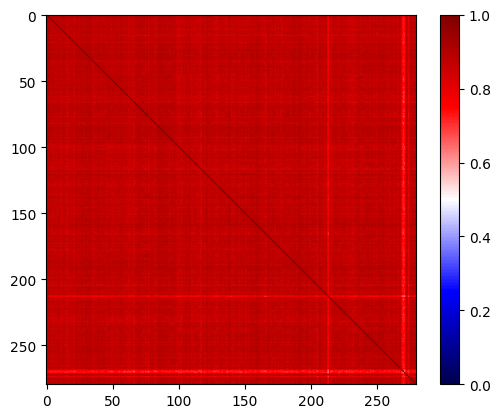

In [57]:
plt.imshow(np.corrcoef(isc_results), cmap = 'seismic', vmin = 0, vmax = 1)
plt.colorbar()

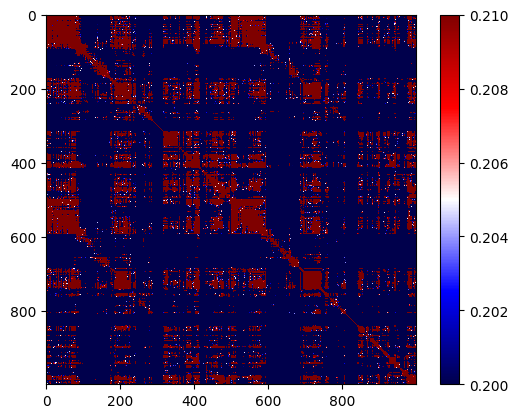

In [63]:
plt.imshow(np.corrcoef(isc_results.T), cmap = 'seismic', vmin = 0.2, vmax = .21)
plt.colorbar()